# PHYS 434 Lab 6 Angela Zhou
# Confidence intervals

In [1]:
# import the libraries
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from matplotlib.pyplot import xticks
import scipy
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

## Setup
### First, we want to have some 'background' data (presumably signal free) onto which we can inject a simulated signal. So the first step is to isolate some appropriate data from your data files. 
### For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

In [2]:
# create a poission background distribution with mean = 100
k = range(50,150)
bkgd = poisson.rvs(mu = 100, size = 1000000)
pdf = poisson.pmf(k,mu = 100)
# plt.hist(bkgd, bins = 100, density = True); # plot the background hist as a check

## Problem 1
### The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. （Hint, you've done this several times now, look back at the first few labs.）

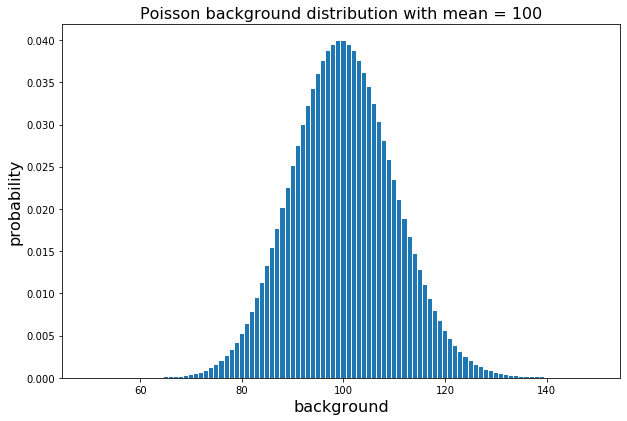

In [3]:
# plot the background distribution
plt.rcParams["figure.figsize"] = (10,6.5)

plt.bar(k, pdf);
plt.title("Poisson background distribution with mean = 100", fontsize = 16);
plt.xlabel("background", fontsize = 16);
plt.ylabel("probability", fontsize = 16);

In [4]:
## find 5 sigma
# convert 5 sigma to probability
p_5 = norm.sf(5)
print(p_5)

# convert probability to sigma
sigma_5 = poisson.isf(p_5, mu = 100) # .isf() is the inverse of .sf()
print("5 sigma threshold: " + str(sigma_5))

2.866515718791933e-07
5 sigma threshold: 154.0


## Problem 2
### Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

In [5]:
## inject signal of known strength
# first calculate 8 sigma and use that as the strength of our injected signal
p_8 = norm.sf(8)
print(p_8)

# convert probability to sigma
sigma_8 = poisson.isf(p_8, mu = 100) # .isf() is the inverse of .sf()
print("8σ threshold: " + str(sigma_8) + ", this will be the strength of my injected signal")

6.22096057427174e-16
8σ threshold: 190.0, this will be the strength of my injected signal


In [6]:
## inject signal of known strength is just shifting the mean of background by that amount of signals
# create the signal array of the same size with the bkgd array with every entry = known signal strength 8σ
signal_2 = np.full(1000000, sigma_8)

# add signal to background
data_2 = bkgd + signal_2

### a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

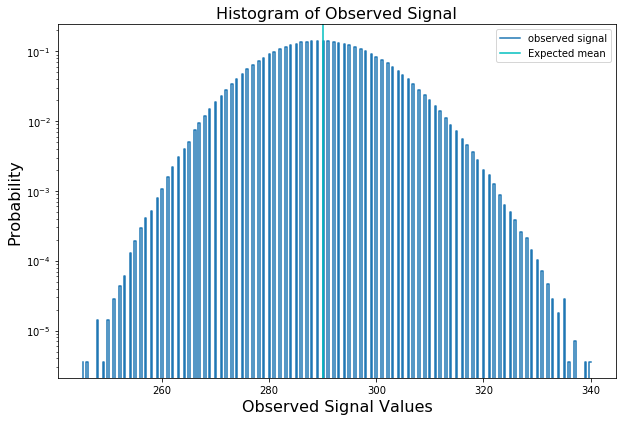

In [7]:
plt.rcParams["figure.figsize"] = (10,6.5)
p,edges = np.histogram(data_2, bins = "auto", density = True)
# plt.hist(data_2, bins = 150, density = True);
# xRange = np.linspace(0, )
plt.step(edges[1:], p, label = "observed signal");
plt.title("Histogram of Observed Signal", fontsize = 16);
plt.xlabel("Observed Signal Values", fontsize = 16);
plt.ylabel("Probability", fontsize = 16);
plt.yscale("log");

plt.axvline(x=290, color = 'c', label = "Expected mean");
plt.legend();
# print(np.where(p == np.max(p))[0][0])
# print(edges[46])
# print(edges[45])
# plt.xlim([280,300])

The plot above is a histogram of the observed signal distribution.The distribution is still a Poisson distribution with mean = 100, it is a discrete distribution and only takes on integer values. The shape of the distribution appears to be a Gaussian and this is due to the central limit theorem. In previous labs we've explored that for a Poisson distribution, the higher the sample size is, the more it looks like a Gaussian distribution. <br>
We can see that it is centered at around x = 290, this means the observed signal value is the most probable around x = 290. This makes sense because initially our original background distribution is centered at 100, we then injected a signal of strength 8σ, which is 190, to the original background. Mean of the observed signal value = mean of original background + injected signal = 100 + 190 = 290. <br>

### b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

The observed signal is unbiased. The observed signal distribution has a peak at around 290 which equals to the mean we expected, 100 + 190. <br>
The observed signal is symmetric. The observed signal = original poisson background + uniformly distributed injected signal. The size of the original Poisson distribution is 1000000, this makes the shape of the original Poisson distributed background close to a Gaussian distribution, and Gaussian distribution is symmetric. If the original background Poisson distribution is symmetric, adding a uniform distribution to it will also give us a symmetric distribution. 

## Problem 3
### Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.
For the distribution we have, anything above 8σ is undefined due to it's extremely small probability. Therefore, I picked the upper limit for the injected signal strengths to be 350. Although 350 is probability not high enough to be 30σ, but it is definitely higher than 8σ, 190. 

In [8]:
### create a new set of signals with a range of injected signal strengths
# choose a random large value as the injected signal strength
strength = 350

# create a new signal array
signal_3 = np.random.uniform(0,strength,1000000)

### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data
I created a suite of injected signals with a range of strengths from 0 to 350 using uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 30σ). <br>
The simulated data = background + true signal with background = original poisson background + random uniformly distributed signal. <br>
The 2d histogram below plots the probability distribution of simulated data on the x axis and true signal on the y axis.

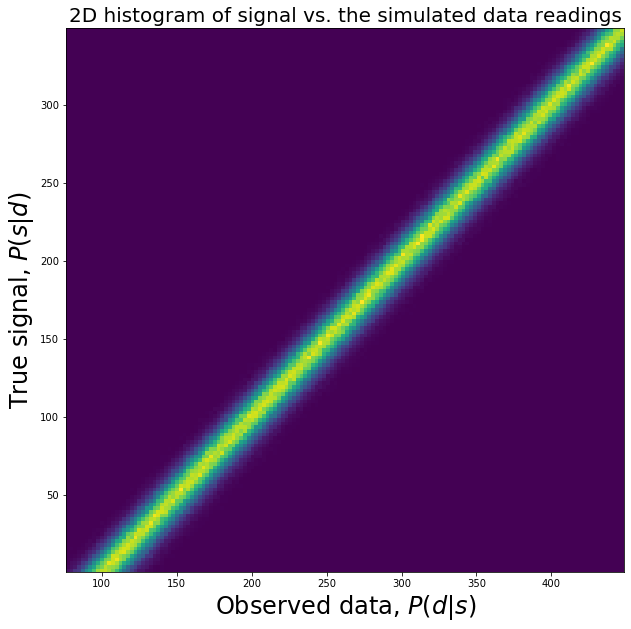

In [9]:
plt.rcParams["figure.figsize"] = (10,10)
data_3 = bkgd + signal_3

signaledges = np.linspace(0,strength,150)
dataedges = np.linspace(75,strength+100,150)

Psd, temp, temp2= np.histogram2d(data_3,signal_3, bins=[dataedges,signaledges], density=True);

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T);
plt.ylabel('True signal, $P(s|d)$', fontsize = 24);
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);
plt.title("2D histogram of signal vs. the simulated data readings", fontsize = 20);

### b) For the same injected signal power as in problem 2, show that you get the same answer.
The injected signal strength in problem 2 is 190. So now I will plot a horizontal strip from the 2D histogram above at y = 190 and compare with the plot in problem 2.

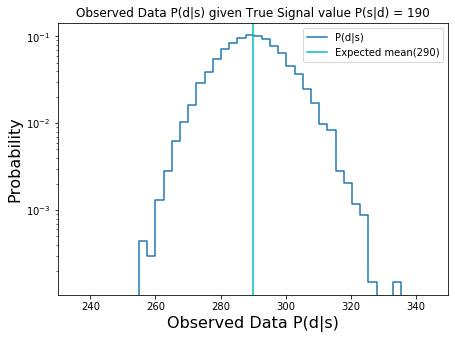

In [10]:
# get a horizontal slice at y = 190
plt.rcParams["figure.figsize"] = (7,5)

# find the bin of true signal = 190
ybin = np.digitize(signal_2, signalcenters)[0]

# extract the data for that specific strip
horizontalStripe = Psd[:,ybin]
# renormalize
horizontalStripe = horizontalStripe / np.sum(horizontalStripe)

plt.step(datacenters,horizontalStripe, label = "P(d|s)");
plt.legend();
plt.title("Observed Data P(d|s) given True Signal value P(s|d) = 190")

plt.xlabel("Observed Data P(d|s)", fontsize = 16);
plt.ylabel("Probability", fontsize = 16);
plt.yscale('log');
plt.axvline(x=290, color = 'c', label = "Expected mean(290)");
plt.legend();
plt.xlim([230, 350]);

From the plot above we can see that our expected mean does fall under the bin where the probability is the highest. Therefore, this plot is also unbiased, our expected mean aligns well with the actual mean. 
<!-- The observed signal is unbiased. The observed signal distribution has a peak at around 290 which equals to the mean we expected, 100 + 190.
The observed signal is not symmetric because the original background Poisson distribution is likely to be asymmetric. Although the mean of the original Poisson distribution is 100 which is pretty high, but its still not sufficiently high enough for the original background to be exactly like a Gaussian distribution which is symmetric. Poisson distribution is not symmetric. -->

In [11]:
# calculate 1σ on both sides and check if it is symmetric
## after finding the peak, integrate the curve to the left of the pk and the right of the pk to find 1σ (~34%)
# initialize two integrals to 0
sum_r = 0 # integral to the right side of the pk
sum_l = 0 # integral to the left side of the pk

# find the index of the peak
index_pk = np.where(horizontalStripe == np.max(horizontalStripe)) [0][0]
pk = datacenters[index_pk]

# look through each bin to calculate the sum
# first calculate the integral on the right of pk
binIndex_r = index_pk
while sum_r < 0.34:
    sum_r = sum_r + horizontalStripe[binIndex_r]
    binIndex_r = binIndex_r + 1
right = datacenters[binIndex_r]
diff_r = right - pk
print("1σ to the right side of the peak is when true signal = " + str(right) + ", this is " + str(diff_r) + " away from the peak.")

# then calculate the integral on the left of pk
binIndex_l = index_pk
while sum_l < 0.34:
    sum_l = sum_l + horizontalStripe[binIndex_l]
    binIndex_l = binIndex_l - 1
left = datacenters[binIndex_l]
diff_l = pk - left
print("1σ to the left side of the peak is when true signal = " + str(left) + ", this is " + str(diff_l) + " away from the peak.")
# print(pk)

1σ to the right side of the peak is when true signal = 300.25167785234896, this is 10.06711409395973 away from the peak.
1σ to the left side of the peak is when true signal = 280.1174496644295, this is 10.06711409395973 away from the peak.


From the outputs above we can see that 1σ to the left of the peak and 1σ to the right of the peak are equally spaced. They are both ~10.067 away from the peak. This tells us the plot above is symmetric.<br>
This plot is centered at around 290, it is unbiased and symmetric, this matches with the answer in problem 2.

### c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.
The observed data value I pick is 350. I will get a vertical strip at x = 350 from the 2D histogram above and plot it in the next cell. The histogram shows the probability distribution of true signal values given that the observed data is 350. Observed data = background + injected data. Therefore, we would expect the mean for the histogram below to be around 250, which is the observed data value - mean for original background (350 - 100). 

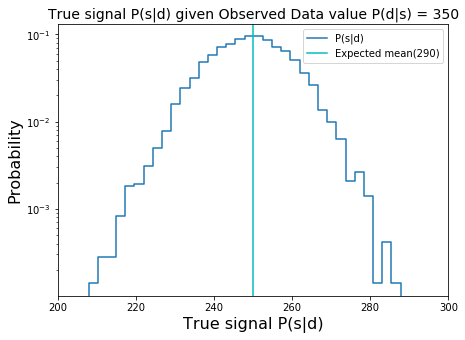

In [12]:
# get a horizontal slice at y = 190
plt.rcParams["figure.figsize"] = (7,5)

# find the bin of true signal = 190
xbin = np.digitize(strength, datacenters)

# extract the data for that specific strip
verticalStripe = Psd[xbin,:]
# renormalize
verticalStripe = verticalStripe / np.sum(verticalStripe)

plt.step(signalcenters,verticalStripe, label = "P(s|d)");
plt.title("True signal P(s|d) given Observed Data value P(d|s) = 350", fontsize = 14);
plt.xlabel("True signal P(s|d)", fontsize = 16);
plt.ylabel("Probability", fontsize = 16);
plt.yscale('log');
plt.axvline(x=250, color = 'c', label = "Expected mean(290)");
plt.legend();
plt.xlim([200, 300]);

From the plot above we can see that the peak does occur when true signal is about 250, this matches with our expectation. 

### d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

In [13]:
# 1 sigma = 34%
# np.std(signal - bk)

# first find the peak in the plot above
index_pk = np.where(verticalStripe == np.max(verticalStripe)) [0][0]
# print(index_pk)
pk = signalcenters[index_pk]
print(pk)

250.16778523489933


In [14]:
# after finding the peak, integrate the curve to the left of the pk and the right of the pk to find 1σ (~34%)
# initialize two integrals to 0
sum_r = 0 # integral to the right side of the pk
sum_l = 0 # integral to the left side of the pk

# look through each bin to calculate the sum
# first calculate the integral on the right of pk
binIndex_r = index_pk
while sum_r < 0.34:
    sum_r = sum_r + verticalStripe[binIndex_r]
    binIndex_r = binIndex_r + 1
right = signalcenters[binIndex_r]
diff_r = right - pk
print("1σ to the right side of the peak is when true signal = " + str(right)+ ", this is " + str(diff_r) + " away from the peak.")

# then calculate the integral on the left of pk
binIndex_l = index_pk
while sum_l < 0.34:
    sum_l = sum_l + verticalStripe[binIndex_l]
    binIndex_l = binIndex_l - 1
left = signalcenters[binIndex_l]
diff_l = pk - left
print("1σ to the left side of the peak is when true signal = " + str(left)+ ", this is " + str(diff_l) + " away from the peak.")

1σ to the right side of the peak is when true signal = 259.56375838926175, this is 9.395973154362423 away from the peak.
1σ to the left side of the peak is when true signal = 238.42281879194633, this is 11.744966442953 away from the peak.


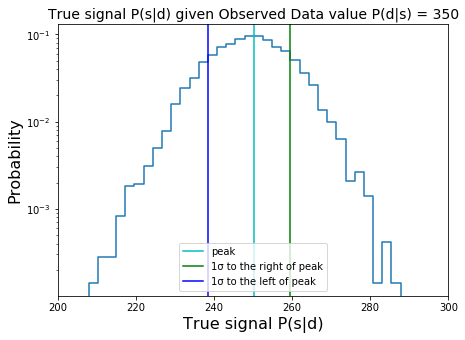

In [15]:
# make the plot above again and indicate 1σ range on the plot
plt.step(signalcenters,verticalStripe);
plt.title("True signal P(s|d) given Observed Data value P(d|s) = 350", fontsize = 14);
plt.xlabel("True signal P(s|d)", fontsize = 16);
plt.ylabel("Probability", fontsize = 16);
plt.yscale('log');
plt.xlim([200, 300]);

# plot 3 lines on the plot
plt.axvline(x=pk, color = 'c', label = "peak");
plt.axvline(x=right, color = "g", label = "1σ to the right of peak");
plt.axvline(x=left, color = "b", label = "1σ to the left of peak");
plt.legend();

1σ uncertainty on the true signal strength for observed signal = 250 is  $250.17_{-11.75}^{+9.396}$.

### e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

From the outputs above we can see that in this plot, 1σ to the left of the peak and to the right of the peak is not equally spaced away from the peak. 1σ to the right of the peak is about 9.396 away from the peak and 1σ to the left of the peak is about 11.745 away from the peak. Therefore, it is not symmetric. <br>
The distribution plotted in part d is also biased. The peak is at true signal ~ 250.17, it is slightly larget than our expectation of 250 = 350 - 100.<br>
This result makes sense because in this problem, we injected a range of uniformly distributed signals to the original background. The original Poission distribution has a shape that is close to a Gaussian and it is centered at 100. The probability of getting background value = 100 is the highest and the probability of getting background values near 100 is high as well; the differences in probability between getting a background value to be exactly 100 and getting background values close to 100, for example, 102 or 95 is small. Therefore, any small change in the distribution could shift the mean. <br>
When we injected a range of uniformly distributed signals, the signal added to every entry of the original background is not all equal, the probability of some injected signal values are little higher, some are a little lower. Although that difference is not big eitherl, but when added to the original background, it could shift the mean by a small amount, therefore, we get a biased distribution. 